In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [112]:
%matplotlib inline

## Sourced NYC Zipcode Data JSON

In [113]:
# Different resource than the original 6.3 I had submitted

# https://data.beta.nyc/en/dataset/nyc-zip-code-tabulation-areas/resource/894e9162-871c-4552-a09c-c6915d8783fb

In [188]:
NYC_Geo= r'/Users/winsontom/Desktop/Career Foundry/Final CF Immersion/Json Files/zip_code_040114.geo.json'

In [189]:
f = open(r'/Users/winsontom/Desktop/Career Foundry/Final CF Immersion/Json Files/zip_code_040114.geo.json')
  
# returns JSON object asa dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Loading Cleaned/Wrangled Data Frame

In [116]:
DF = pd.read_csv(r'/Users/winsontom/Desktop/Career Foundry/Final CF Immersion/02 Data/4.0 Cleaned further.csv')

In [117]:
DF.head(5)

,Address,Borough,Property Type,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Exact Address,Neighborhood,County,Zipcode,Brokerage
0,2 E 55th St Unit 803,Manhattan,Condo,2,2,315000,1400,225.00,"Regis Residence, 2 E 55th St #803, New York, N...",New York,New York County,10022,Douglas Elliman -111 Fifth Ave
1,Central Park Tower Penthouse-217 W 57th St Un...,Manhattan,Condo,7,10,195000000,17545,11114.28,"217 W 57th St, New York, NY 10019, USA",New York,New York County,10019,Serhant
2,620 Sinclair Ave,Staten Island,House,4,2,260000,2015,129.03,"620 Sinclair Ave, Staten Island, NY 10312, USA",Staten Island,Richmond County,10312,Sowae Corp
3,2 E 55th St Unit 908W33,Manhattan,Condo,3,1,69000,445,155.06,"2 E 55th St, New York, NY 10022, USA",New York,New York County,10022,COMPASS
4,5 E 64th St,Manhattan,Townhouse,7,2,55000000,14175,3880.07,"5 E 64th St, New York, NY 10065, USA",New York,New York County,10065,Sotheby's International Realty - East Side Ma...


In [118]:
DF.shape

(4552, 13)

In [119]:
DF.columns

Index(['Address', 'Borough', 'Property Type', 'Bedrooms', 'Bathrooms', 'Price',
       'Square Footage', 'Price Per Square Feet', 'Exact Address',
       'Neighborhood', 'County', 'Zipcode', 'Brokerage'],
      dtype='object')

In [120]:
DF.head(1)

,Address,Borough,Property Type,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Exact Address,Neighborhood,County,Zipcode,Brokerage
0,2 E 55th St Unit 803,Manhattan,Condo,2,2,315000,1400,225.0,"Regis Residence, 2 E 55th St #803, New York, N...",New York,New York County,10022,Douglas Elliman -111 Fifth Ave


In [121]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = DF[['Address','Price']]
data_to_plot.head()

,Address,Price
0,2 E 55th St Unit 803,315000
1,Central Park Tower Penthouse-217 W 57th St Un...,195000000
2,620 Sinclair Ave,260000
3,2 E 55th St Unit 908W33,69000
4,5 E 64th St,55000000


## Aggregating data by zip code and calculating the average price

In [122]:
Grouped_Zipcode= DF.groupby('Zipcode')

In [123]:
np.set_printoptions(precision=8, suppress=True)

In [124]:
#Aggregating by zipcode to get mean
DF3 = DF.groupby('Zipcode').agg({'Price':['mean']})

In [125]:
DF3.head(10)

,Price
,mean
Zipcode,
10001,3.246176e+06
10002,2.795000e+06
10003,3.660272e+06
10004,1.653166e+06
10005,1.990400e+06
10006,1.846667e+06
10007,8.073875e+06
10009,1.283273e+06


In [126]:
# Clean this up such that its not just an aggregated "Price, mean" column but rather a true column

DF_AvgPrice = DF.groupby(['Zipcode'], as_index=False)['Price'].mean()
DF_AvgPrice.head(5)

,Zipcode,Price
0,10001,3.246176e+06
1,10002,2.795000e+06
2,10003,3.660272e+06
3,10004,1.653166e+06
4,10005,1.990400e+06


In [127]:
# Histogram for the varying Prices

/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

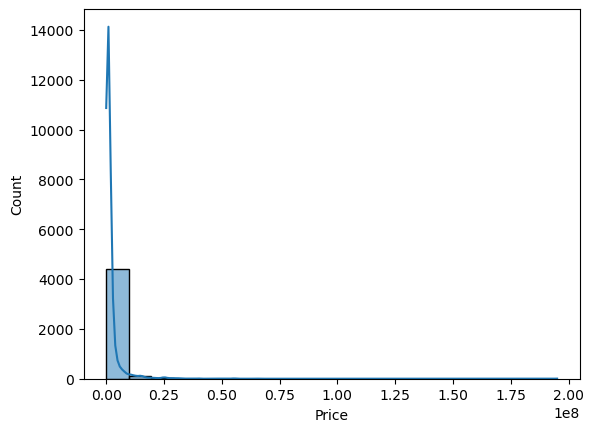

In [128]:
sns.histplot(DF['Price'], bins=20, kde = True)

In [129]:
DF_AvgPrice.describe

<bound method NDFrame.describe of      Zipcode         Price
0      10001  3.246176e+06
1      10002  2.795000e+06
2      10003  3.660272e+06
3      10004  1.653166e+06
4      10005  1.990400e+06
..       ...           ...
173    11691  7.308571e+05
174    11692  9.619998e+05
175    11693  9.000000e+05
176    11694  1.284474e+06
177    11697  6.920000e+05

[178 rows x 2 columns]>

## Create a Folium map object

In [140]:
DF_AvgPrice

,Zipcode,Price
0,10001,3.246176e+06
1,10002,2.795000e+06
2,10003,3.660272e+06
3,10004,1.653166e+06
4,10005,1.990400e+06
...,...,...
173,11691,7.308571e+05
174,11692,9.619998e+05
175,11693,9.000000e+05
176,11694,1.284474e+06


In [150]:
DF_AveragePrice = DF[['Zipcode','Price']]

In [151]:
DF_AveragePrice

,Zipcode,Price
0,10022,315000
1,10019,195000000
2,10312,260000
3,10022,69000
4,10065,55000000
...,...,...
4547,10075,599000
4548,11374,245000
4549,10011,1275000
4550,11373,598125


In [184]:
DF_AveragePrice.rename(columns = {'Zipcode' : 'ZIPCODE'}, inplace = True)

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_40556/4190282973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_AveragePrice.rename(columns = {'Zipcode' : 'ZIPCODE'}, inplace = True)


In [185]:
DF_AveragePrice.columns

Index(['ZIPCODE', 'Price'], dtype='object')

In [187]:
map = folium.Map([40.7591622,-74.0516324], zoom_start=10)

folium.GeoJson(
NYC_Geo,
name="NYC Data",
data='DF_AveragePrice',
columns=['ZIPCODE', 'Price'],
key_on='feature.properties.ZIPCODE',
fill_color='YlOrBr',
fill_opacity=0.6,
line_opacity=0.1,
legend_name='Listing Price'
).add_to(map)

folium.LayerControl().add_to(map)

map

TypeError: GeoJson.__init__() got multiple values for argument 'data'

In [191]:
map = folium.Map([40.7591622,-74.0516324], zoom_start=10)

folium.GeoJson(
NYC_Geo,
data=DF_AvgPrice,
1, 2,
key_on='feature.properties.ZIPCODE',
fill_color='YlOrBr',
fill_opacity=0.6,
line_opacity=0.1,
legend_name='Listing Price'
).add_to(map)

folium.LayerControl().add_to(map)

map

SyntaxError: positional argument follows keyword argument (179764378.py, line 12)